# Stock Market Predictions and Forecasting Model using LSTM 
---
- Creating a stock market prediction and forecasting model using LSTM (Long Short-Term Memory) involves building a time-series model that can analyze the historical data of stock prices and predict future trends.
- Note: Remember, stock market prices are highly unpredictable and volatile, and there are no consistent patterns that allow for perfect modeling over time. It’s important to approach stock market prediction with caution and skepticism, as even sophisticated models like LSTM cannot guarantee accurate predictions.

`Dataset Link: ` https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing Required Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
df = pd. read_csv('NSE-TATAGLOBAL.csv')
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [3]:
df1 = df.copy()
df1

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.shape

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


- change the datatype of the date from string to DateTime

In [6]:
df['Date']= pd.to_datetime(df['Date'])

In [7]:
df.describe()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,2014-08-20 14:43:06.339066112,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
min,2010-07-21 00:00:00,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,2012-07-28 12:00:00,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,2014-08-14 00:00:00,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,2016-09-10 12:00:00,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2018-09-28 00:00:00,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000
std,NaN,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877


# Checking for the null values

In [8]:
def find_dirty_values(data):
    dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)
    dtypes["Null Values"]=data.isnull().sum()
    dtypes["% null Values"]=data.isnull().sum()/len(data)
    return dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [9]:
null_data = find_dirty_values(df)
null_data

,Data Type,Unique Values,Null Values,% null Values
Date,datetime64[ns],2035,0,0.000000
Open,float64,1165,0,0.000000
High,float64,1257,0,0.000000
Low,float64,1263,0,0.000000
Last,float64,1268,0,0.000000
Close,float64,1313,0,0.000000
Total Trade Quantity,int64,2034,0,0.000000
Turnover (Lacs),float64,2030,0,0.000000


# Data Visualization

<Axes: >

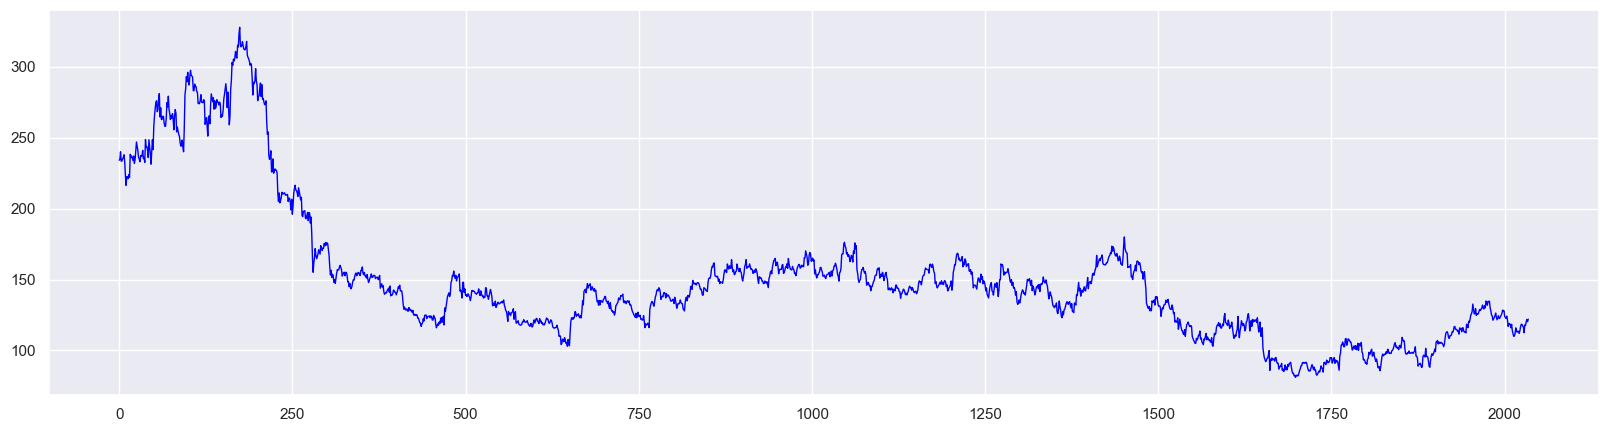

In [10]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='blue')

- Similarly checking out the price of stocks Open, High, Low and Close 

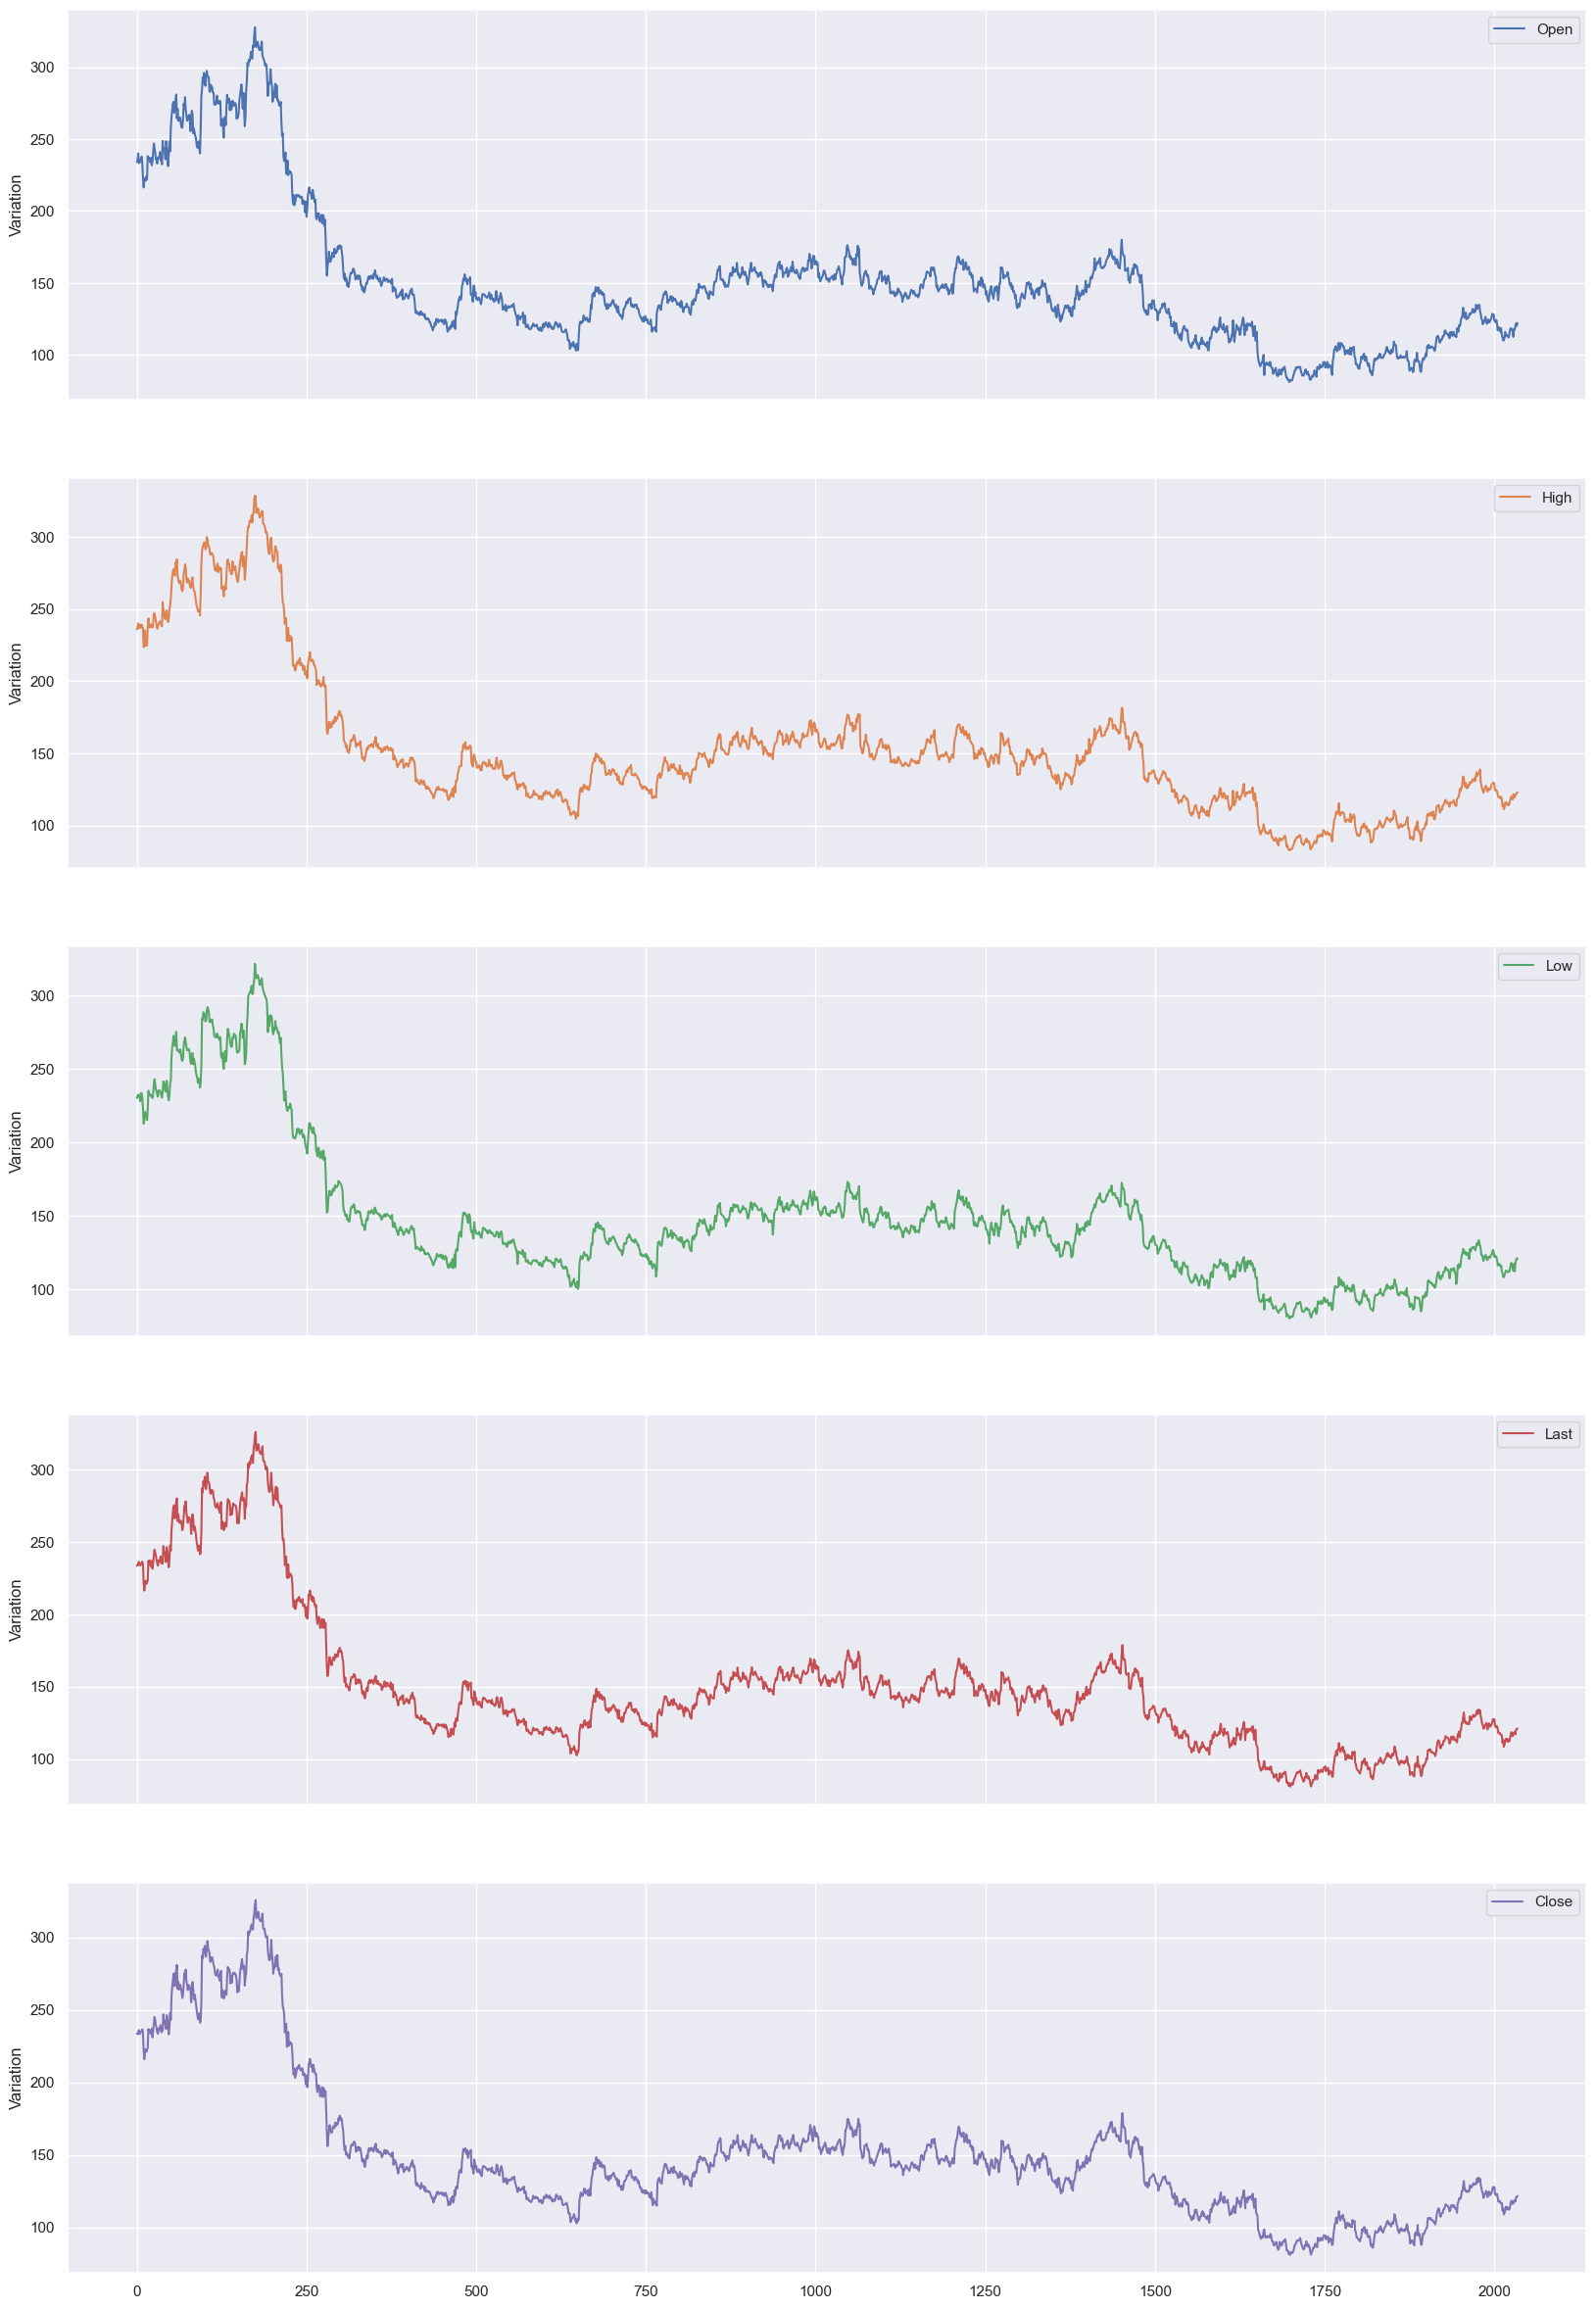

In [11]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

In [12]:
df.index=df['Date']
del df["Date"]
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


- rolling 7 days plot of the stocks

In [13]:
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<Axes: xlabel='Date'>

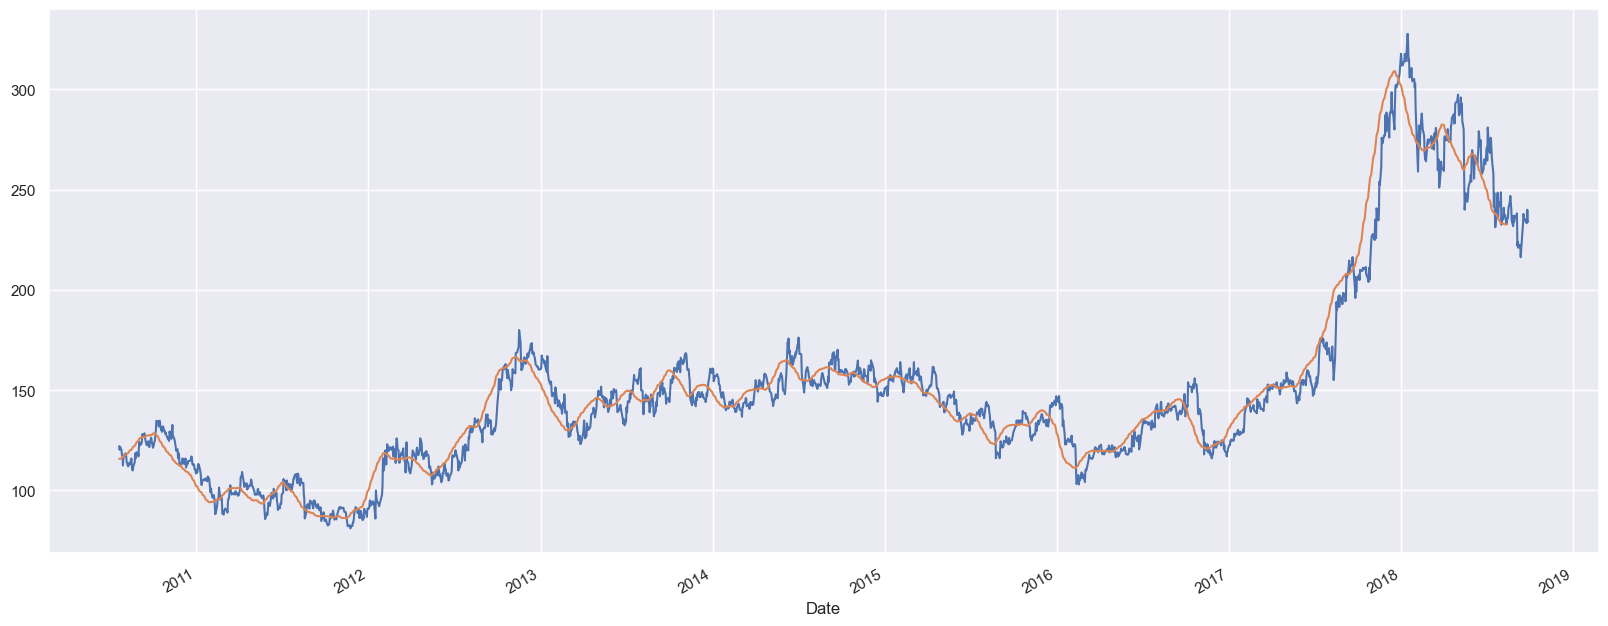

In [14]:
df['Open'].plot(figsize=(20,8),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

<Axes: xlabel='Date'>

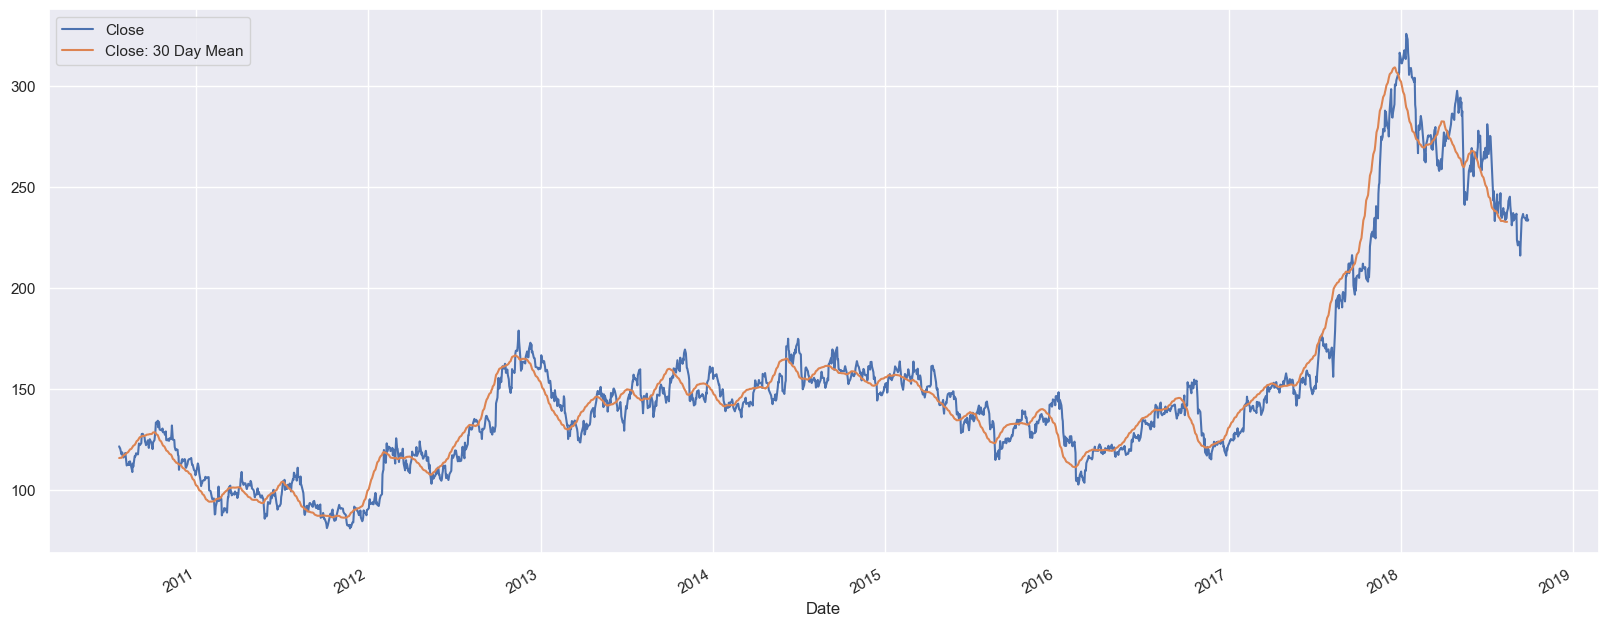

In [15]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(20,8),alpha = 1)

<Axes: xlabel='Date'>

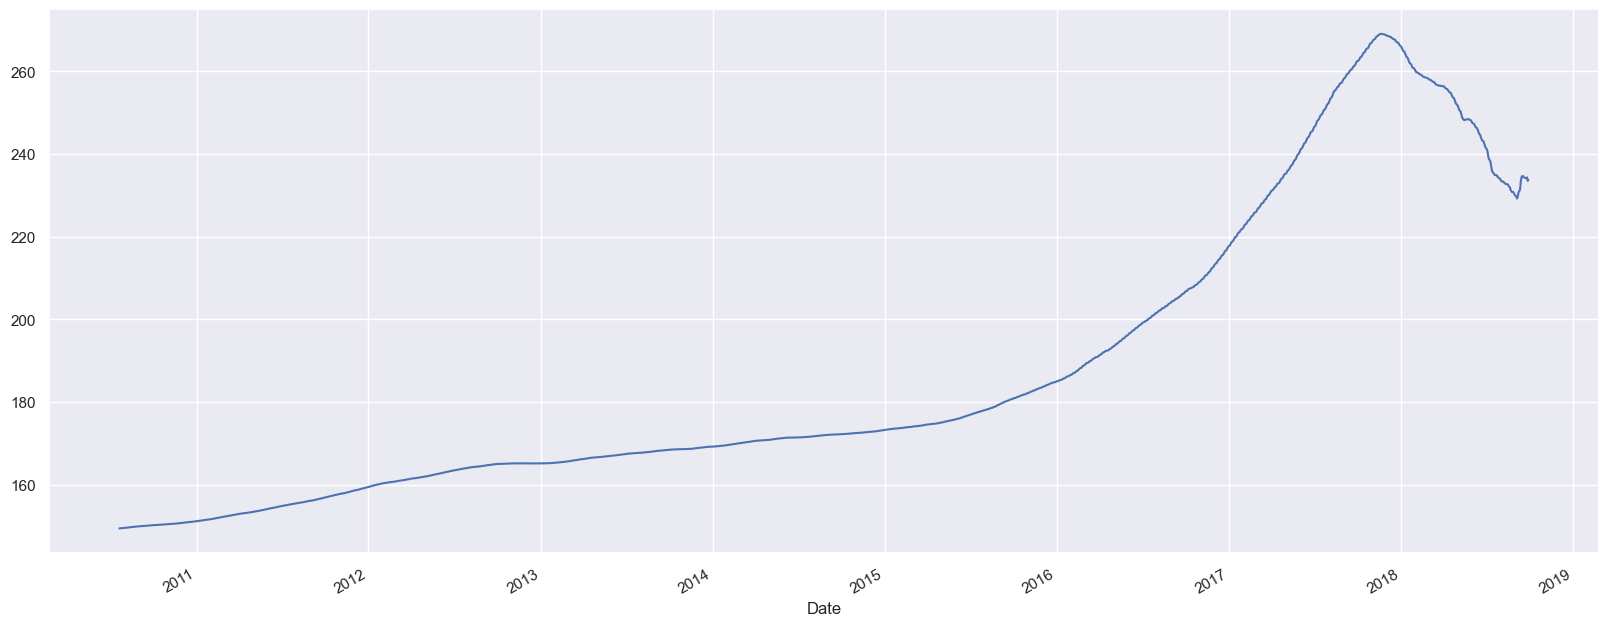

In [16]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha = 1)

In [17]:

df2=df1.reset_index()['Open']
df2

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

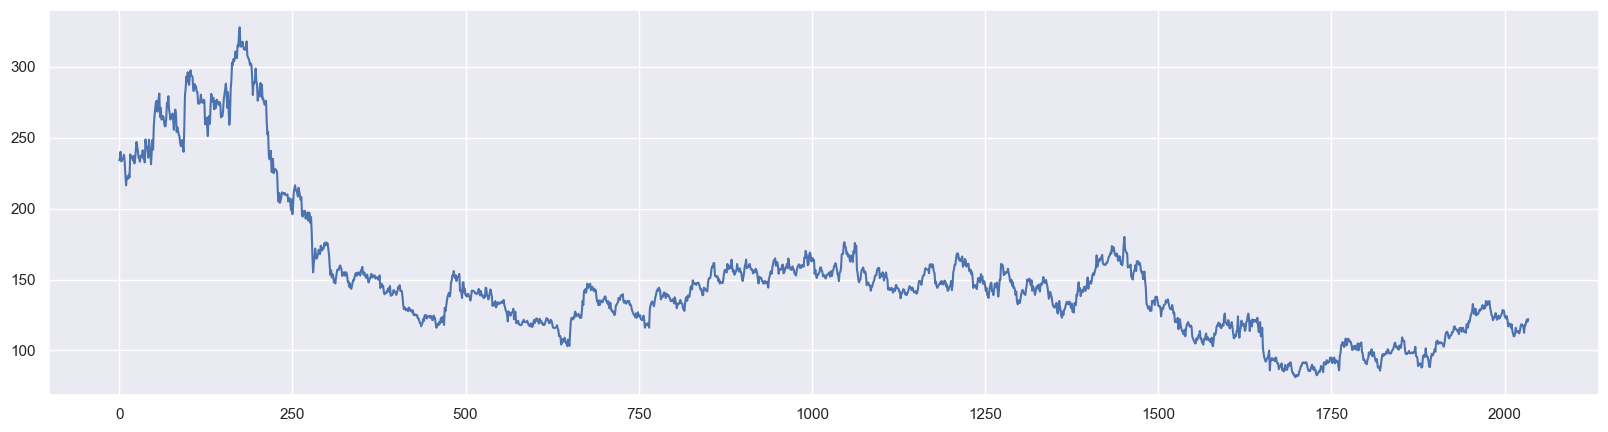

In [18]:
plt.plot(df2)

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


# splitting dataset into train and test split

In [20]:
train_size=int(len(df2)*0.75)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]


In [21]:
train_data,test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

In [22]:
print(f"Shape Of Training Data Set : ",train_data.shape)
print(f"Shape Of Testing Data Set :",test_data.shape)

Shape Of Training Data Set :  (1526, 1)
Shape Of Testing Data Set : (509, 1)


## convert an array of values into a dataset matrix

In [23]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

## reshape input to be [samples, time steps, features] which is required for LSTM

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
print(f"Shape Of Training Data Set : ",X_train.shape)
print(f"Shape Of Testing Data Set :",X_test.shape)
print(f"Shape Of Train Label :",y_train.shape)
print(f"Shape Of Test Label :",y_test.shape)

Shape Of Training Data Set :  (1425, 100, 1)
Shape Of Testing Data Set : (408, 100, 1)
Shape Of Train Label : (1425,)
Shape Of Test Label : (408,)


In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\YASHRAJ MISHRA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Model LSTM Results

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 0.0489 - val_loss: 0.0100
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0030 - val_loss: 9.0559e-04
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 9.7280e-04 - val_loss: 9.7452e-04
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 9.7441e-04 - val_loss: 7.6239e-04
Epoch 12/100
23/23 ━━━━━━━━━━━━━

# Prediction and Perfomance of Stacked LSTM

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


## Calculate RMSE performance metrics

In [31]:
math.sqrt(mean_squared_error(y_train,train_predict))

161.88984630925015

## Test Data RMSE

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

105.9245817371168

## shift train predictions for plotting

In [34]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

In [35]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## plot baseline and predictions 

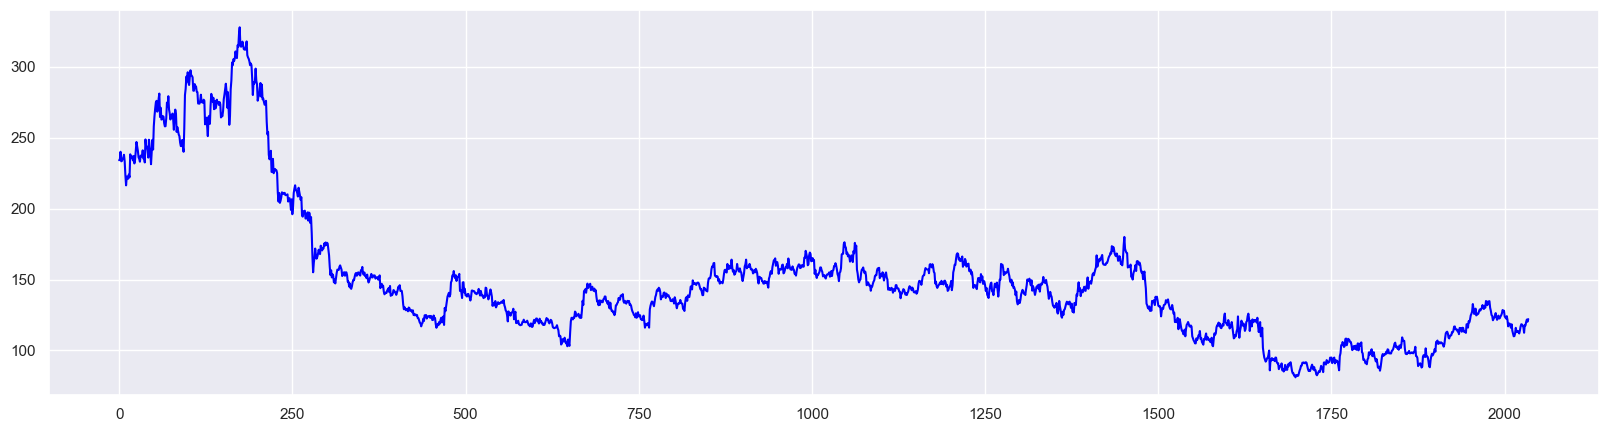

In [36]:
pred  = scaler.inverse_transform(df2)
plt.plot(pred,color='blue')
plt.show()

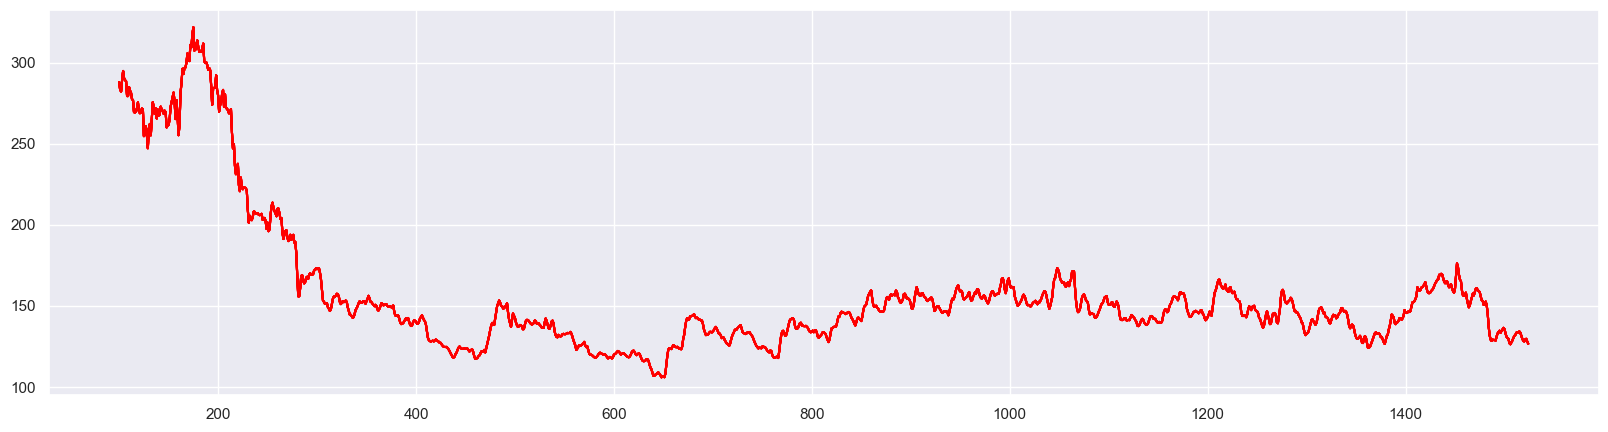

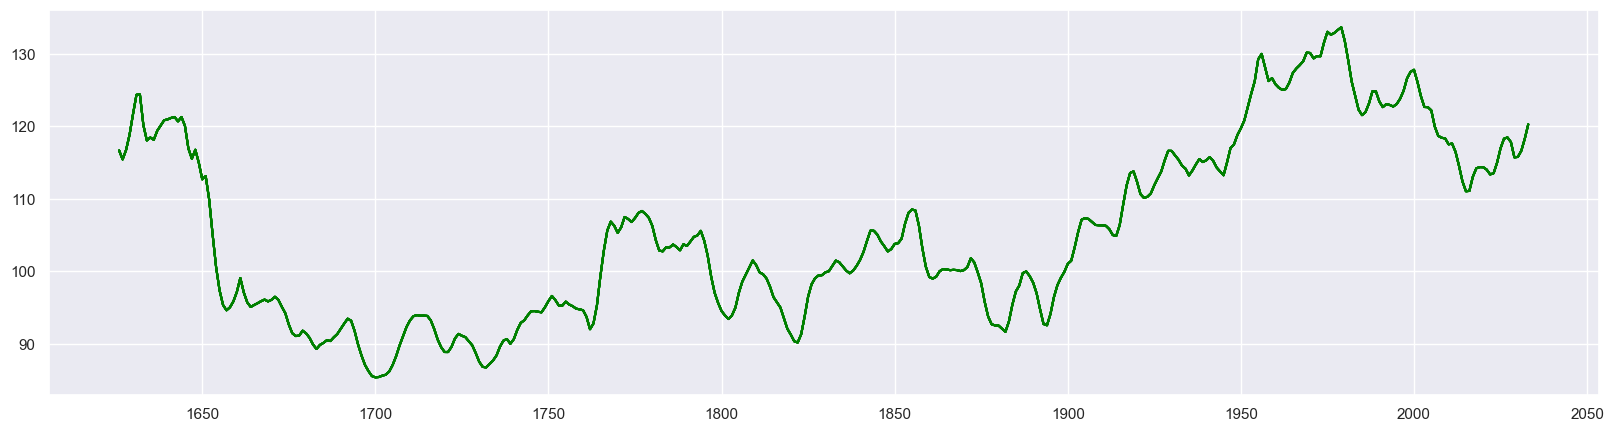

In [37]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

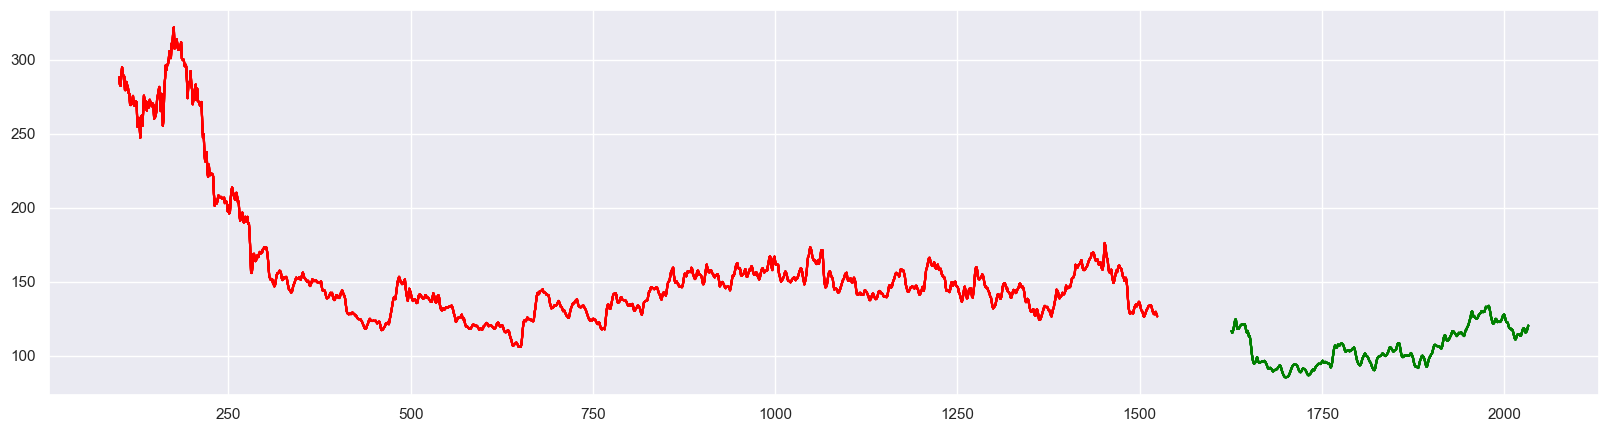

In [38]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

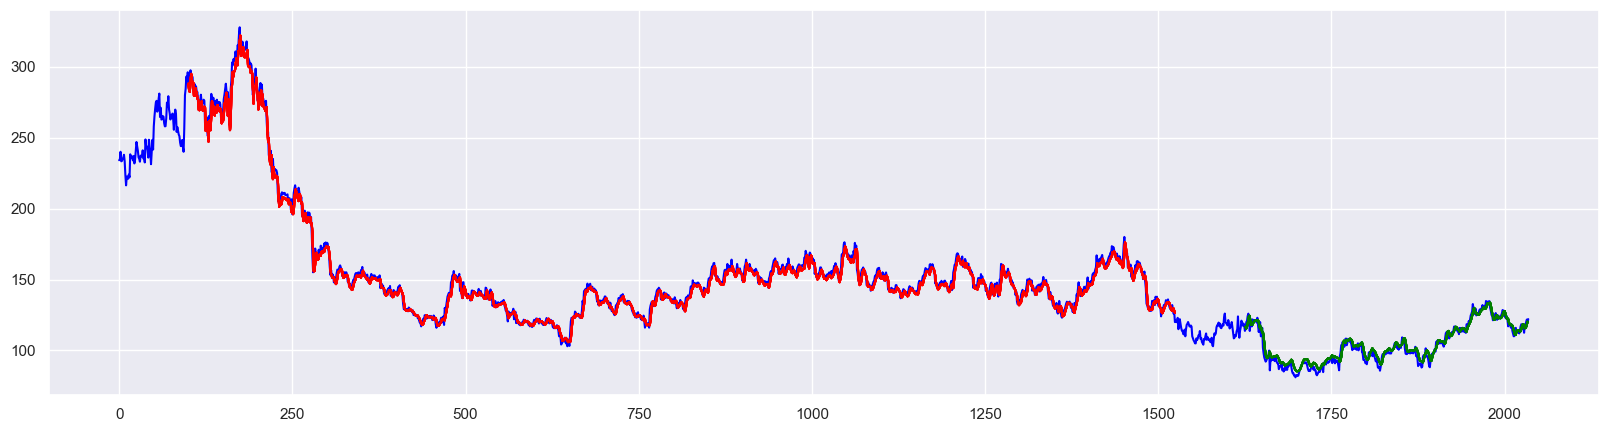

In [39]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [40]:
len(test_data)

509

In [41]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

# Saving Predicted Model

In [42]:
model.save("stock_model.h5")